<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFO5731 Assignment Four**

n this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.


#**Question 1: Topic Modeling**



(30 points).This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, select two models and write a python program to identify the top 20 topics (with 15 words for each topic) in the dataset. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1) Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2) Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3) HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4) SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5) Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6) LDA2VEC: https://github.com/cemoody/lda2vec

(7) BERTopic: https://github.com/MaartenGr/BERTopic

(8) LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9) Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)

The following information should be reported:

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster.

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis




In [ ]:

import pickle
import logging
 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from zipfile import ZipFile 
d = '/content/Assignment four data Yelp (question 1 and 2).zip'

with ZipFile(d, 'r') as a:  
    print('Extracting all the files now...') 
    a.extractall() 
    print('Done!')

FileNotFoundError: ignored

In [ ]:
# read the list of files in folders
import glob
import json
nameOfFile = glob.glob("/content/Assignment four data Yelp (question 1 and 2)/*.json")
area_of_text = list()
ratings = list()
valueOfDate = list()
def assignSentiment(var):
  if(var == 5):
    return "Very positive"
  elif(var==4):
    return "Positive"
  elif(var==3):
    return "Neutral"
  elif(var==2):
    return "Negative"
  elif(var==1):
    return "Very Negative"
list_token = list()
for file in nameOfFile:
  with open(file,encoding = "utf-8") as i:
    JSONdata = json.load(i)
    for json in JSONjson:
      area_of_text.append(json['text'])
      ratings.append(json['ratings'])
      valueOfDate.append(json['date'])
      list_token.append(assignSentiment(json['ratings']))



In [ ]:
import pandas as pd

dataFrameNeeded = pd.DataFrame(area_of_text,columns = ["Review"])
dataFrameNeeded["Rating"] = ratings
dataFrameNeeded["Date"] = valueOfDate
dataFrameNeeded["sentiments"] = list_token

In [ ]:
#display the dataframe
dataFrameNeeded.head(5)

,Review,Rating,Date,sentiments
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive


In [ ]:
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["Review"].apply(lambda x : x.lower())
import string
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["cleaned_data"].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_of_words = set(stopwords.words('english'))
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in list_of_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

regularWords = list(pd.Series(' '.join(dataFrameNeeded['cleaned_data']).split()).value_counts()[:15].index)
#top 15 rare words
uncommonWords = list(pd.Series(' '.join(dataFrameNeeded['cleaned_data']).split()).value_counts()[-15:].index)

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in regularWords]))

In [ ]:
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in uncommonWords]))

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import textblob
ps = PorterStemmer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataFrameNeeded["cleaned_data"] = dataFrameNeeded["cleaned_data"].apply(lambda x: ' '.join(word_tokenize(str(x))))

In [ ]:
dataFrameNeeded.head(10)

,Review,Rating,Date,sentiments,cleaned_data
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive,awesome fantastic wait staff friendly accommod...
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative,seemed pretty pricey gotburgers tasted pretty ...
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative,tried buffet tuesday eve dinner found closed m...
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive,came lunch 20th birthday gave free dessert sig...
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive,amazing treats love cinnamon roll cupcakes ice...
5,Me and my family went to TasteBuds tonight..I ...,4.0,2015-05-19 06:32:17,Positive,family went tastebuds tonighti love begin went...
6,Stay away from this train wreck of a hospital ...,1.0,2014-10-06 23:19:01,Very Negative,stay away train wreck hospital er unprofession...
7,I have now had two amazing meals here and can'...,5.0,2012-01-20 21:04:38,Very positive,two amazing meals cant wait return steaks lobs...
8,My classmates and I go here because we go to c...,4.0,2015-09-17 01:46:28,Positive,classmates cpcc walking distance classes alway...
9,Really good service. They helped us pick out f...,5.0,2018-07-14 19:17:05,Very positive,helped pick frames whole family patient billed...


In [ ]:
from gensim import corpora, models
contentOfReviews = dataFrameNeeded["cleaned_data"].head(10000).values
reviews = [i.split() for i in contentOfReviews]

LLDA_map = corpora.Dictionary(reviews)
LLDA_map.filter_extremes(no_below=3)
corpus = [LLDA_map.doc2bow(list_of_tokens) for list_of_tokens in reviews]

num_topics = 20
%time modelOfLDA = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=LLDA_map, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(LLDA_map.keys()))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 34.8 s, sys: 10 ms, total: 34.8 s
Wall time: 34.8 s


In [ ]:
for i,topic in modelOfLDA.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.034*"dog" + 0.019*"dogs" + 0.018*"kids" + 0.017*"dr" + 0.017*"love" + 0.016*"park" + 0.011*"play" + 0.011*"staff" + 0.009*"family" + 0.009*"fun"

1: 0.010*"table" + 0.010*"minutes" + 0.010*"came" + 0.009*"didnt" + 0.008*"asked" + 0.007*"even" + 0.007*"got" + 0.007*"said" + 0.006*"order" + 0.006*"could"

2: 0.016*"beer" + 0.011*"menu" + 0.011*"bar" + 0.007*"night" + 0.007*"wine" + 0.007*"atmosphere" + 0.007*"little" + 0.007*"selection" + 0.007*"drinks" + 0.006*"happy"

3: 0.024*"love" + 0.020*"always" + 0.019*"friendly" + 0.014*"delicious" + 0.013*"staff" + 0.012*"fresh" + 0.011*"definitely" + 0.011*"nice" + 0.011*"best" + 0.010*"amazing"

4: 0.040*"coffee" + 0.029*"breakfast" + 0.016*"nails" + 0.014*"eggs" + 0.014*"nail" + 0.013*"brunch" + 0.012*"amazing" + 0.010*"nice" + 0.010*"super" + 0.009*"friendly"

5: 0.039*"hair" + 0.015*"cut" + 0.012*"always" + 0.011*"love" + 0.009*"color" + 0.008*"salon" + 0.008*"class" + 0.008*"awesome" + 0.007*"workout" + 0.007*"want"

6: 0.020*"chicke

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5bdc08aa96b8f25221227156524d7457b94a9a6c7ea1965aabd750cf12a20c1b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
v = pyLDAvis.gensim.prepare(topic_model=modelOfLDA, corpus=corpus, dictionary=LLDA_map)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195426 sha256=ba3d443d77b586ebee1b578556eb4b2452f7165d3587fb060023c85fbba8fccc
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bitermDataRev  = dataFrameNeeded["cleaned_data"].head(1000).values
Vecto= CountVectorizer(stop_words='english')
X = Vecto.fit_transform(bitermDataRev ).toarray()

In [ ]:
from biterm.utility import vec_to_biterms

vo = np.array(Vecto.get_feature_names())
biterms = vec_to_biterms(X)

In [ ]:
from biterm.btm import oBTM

btm = oBTM(num_topics=20, V=vocab)
ModelOfBTM = btm.fit_transform(biterms, iterations=10)


100%|██████████| 10/10 [1:37:43<00:00, 586.38s/it]


In [ ]:
import numpy as np
import pyLDAvis
from biterm.cbtm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary # helper functions


def view():

    Vecto= CountVectorizer(stop_words='english')
    X = Vecto.fit_transform(bitermDataRev [:100]).toarray()

    # get vocabulary
    vo = np.array(Vecto.get_feature_names())

    # get biterms
    biterms = vec_to_biterms(X)

    # create btm
    btm = oBTM(num_topics=20, V=vocab)

    print("\n\n Train Online BTM ..")
    for i in range(0, len(biterms), 100): # prozess chunk of 200 texts
        chunkOfBitterms = biterms[i:i + 100]
        btm.fit(chunkOfBitterms, iterations=10)
    topics = btm.transform(biterms)

    print("\n\n Visualize Topics ..")
    v = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))
    # pyLDAvis.save_html(vis, './vis/online_btm.html')
    pyLDAvis.enable_notebook()
    pyLDAvis.display(vis)

    print("\n\n Topic coherence ..")
    topic_summuary(btm.phi_wz.T, X, vocab, 10)

    print("\n\n Texts & Topics ..")
    for i in range(len(reviews[:100])):
        print("{} (topic: {})".format(reviews[i], topics[i].argmax()))

    return vis

vis1 = view()



 Train Online BTM ..





  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:19<02:59, 20.00s/it]


 20%|██        | 2/10 [00:40<02:40, 20.00s/it]


 30%|███       | 3/10 [00:59<02:19, 19.95s/it]


 40%|████      | 4/10 [01:19<01:59, 19.91s/it]


 50%|█████     | 5/10 [01:39<01:39, 19.91s/it]


 60%|██████    | 6/10 [01:59<01:19, 19.89s/it]


 70%|███████   | 7/10 [02:19<00:59, 19.88s/it]


 80%|████████  | 8/10 [02:39<00:39, 19.86s/it]


 90%|█████████ | 9/10 [02:58<00:19, 19.85s/it]


100%|██████████| 10/10 [03:18<00:00, 19.89s/it]




 Visualize Topics ..


 Topic coherence ..
Topic 0 | Coherence=-52.08 | Top words= delicious know definitely im owner dont thought better ive left
Topic 1 | Coherence=-39.22 | Top words= decided drinks nice asked im liked view instead phone queen
Topic 2 | Coherence=-38.62 | Top words= meat better children 10 going im dining review pay mcdonalds
Topic 3 | Coherence=-35.64 | Top words= got charge manager small notes originally say dont size chairs
Topic 4 | Coherence=-45.73 | Top words= staff went im come bit didnt vegas say price got
Topic 5 | Coherence=-53.70 | Top words= amazing recommend dont got didnt shrimp giving choose chicken went
Topic 6 | Coherence=-41.77 | Top words= flavor pretty guess small meat hot bread ordered cheap little
Topic 7 | Coherence=-33.91 | Top words= right grill said literally looked say store away minutes went
Topic 8 | Coherence=-54.77 | Top words= said arent pretty got sell ive better bring choices music
Topic 9 | Coherence=-44.66 | Top words= dont bar 

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

#**Question 2: Yelp Review Sentiment Analysis**


(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: 80% data for training and 20% data for testing.



The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{ // string, 22 character unique review id "review_id": "zdSx_SD6obEhz9VrW9uAWA",

// string, 22 character unique user id, maps to the user in user.json
"user_id": "Ha3iJu77CxlrFm-vQRs_8g",

// string, 22 character business id, maps to business in business.json
"business_id": "tnhfDv5Il8EaGSXZGiuQGg",

// integer, star rating
"ratings": 4,

// string, date formatted YYYY-MM-DD
"date": "2016-03-09",

// string, the review itself
"text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

// integer, number of useful votes received
"useful": 0,

// integer, number of funny votes received
"funny": 0,

// integer, number of cool votes received
"cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 ratings

Positive = 4 ratings

Neutral = 3 ratings

Negative = 2 ratings

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples.

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
dataFrameNeeded.head(5)

,Review,Rating,Date,sentiments,cleaned_data
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive,awesome fantastic wait staff friendly accommod...
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative,seemed pretty pricey gotburgers tasted pretty ...
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative,tried buffet tuesday eve dinner found closed m...
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive,came lunch 20th birthday gave free dessert sig...
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive,amazing treats love cinnamon roll cupcakes ice...


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
def accuracyFind(predicted,actual):
  print("\033[1m"+"Accuracy Score = ",round(accuracy_score(predicted,actual),2)*100,"%"+"\033[0m")
  print("\033[1m"+"The Classification report"+"\033[0m")
  print(classification_report(actual,predicted))
  # sys.modules[__name__].__dict__.clear()
  pass

In [ ]:
import seaborn as sns
def viewer(var):
  sns.heatmap(pd.DataFrame(var).iloc[:-1, :].T, annot=True)
  pass

In [ ]:

def analyse_the_accuracy(n_splits):
  seed = 7
 
  kfold = KFold(n_splits, random_state=seed,shuffle=True)
  
  marks = 'accuracy'
  return kfold
  pass

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_val_score_computation(modelObject, x_test,y_test):
  kfold = analyse_the_accuracy(10)
  print("\033[1m"+"Cross Validation Score",round(cross_val_score(modelObject,x_test,y_test,cv=kfold).mean()*100,2),"%","\033[0m")
  pass

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
#display the vocabulary
vectorizer = TfidfVectorizer(analyzer='word')
tf_idf = vectorizer.fit_transform(dataFrameNeeded["cleaned_data"].head(1000).values)
list_of_column_names = vectorizer.get_feature_names()
tf_idf_df = pd.DataFrame(tf_idf.toarray())
tf_idf_df.columns = list_of_column_names

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
x_train, x_test, y_train, y_test = train_test_split(tf_idf_df, dataFrameNeeded['sentiments'].head(1000).values,test_size=0.2)

In [ ]:
training_tf_idf_data = vectorizer.transform(dataFrameNeeded["cleaned_data"])

In [ ]:

from sklearn.svm import LinearSVC
linearSVC = LinearSVC()

In [ ]:
linearSVC_model = linearSVC.fit(x_train,y_train)

In [ ]:
y_op_linearSVC = linearSVC_model.predict(x_test)

In [ ]:
y_op_linearSVC

array(['Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Positive', 'Positive', 'Positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very Negative', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Positive', 'Positive', 'Positive',
       'Very positive', 'Positive', 'Very positive', 'Very Negative',
       'Very Negative', 'Very Negative', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Neutral', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very Negative',
       'Very Negative', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very Negative',
       'Very positive', 'Positive', 'Positive', 'Very positive',
 

In [ ]:
accuracyFind(y_op_linearSVC,y_test)

Accuracy Score =  52.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        22
      Neutral       0.25      0.05      0.08        20
     Positive       0.48      0.32      0.38        47
Very Negative       0.45      0.54      0.49        28
Very positive       0.55      0.87      0.67        83

     accuracy                           0.52       200
    macro avg       0.35      0.35      0.33       200
 weighted avg       0.43      0.52      0.45       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_val_score_computation(linearSVC_model,x_test,y_test)

Cross Validation Score 44.5 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


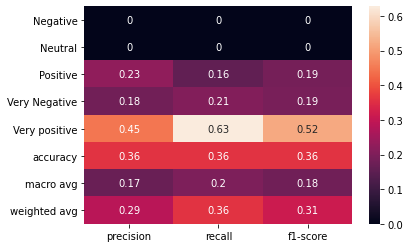

In [ ]:
#visualize the metrics 
viewer(classification_report(y_test,y_op_linearSVC,output_dict=True))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()

In [ ]:
mnbModel = multinomialNB.fit(x_train,y_train)

In [ ]:
yopm = mnbModel.predict(x_test)

In [ ]:
accuracyFind(yopm,y_test)

Accuracy Score =  47.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        12
      Neutral       0.00      0.00      0.00        21
     Positive       0.00      0.00      0.00        44
Very Negative       0.00      0.00      0.00        29
Very positive       0.47      1.00      0.64        94

     accuracy                           0.47       200
    macro avg       0.09      0.20      0.13       200
 weighted avg       0.22      0.47      0.30       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_val_score_computation(mnbModel,x_test,y_test)

Cross Validation Score 47.0 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


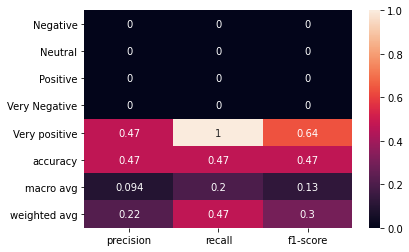

In [ ]:
#visualize the metrics 
viewer(classification_report(y_test,yopm,output_dict=True))

#**Question 3: House price prediction**


(40 points). You are required to build a regression model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
train_data = pd.read_csv('train.csv')
train_data

In [ ]:

test_data = pd.read_csv('test.csv')
test_data

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

In [ ]:
train_data.info()

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
test_data.info()

In [ ]:

matrix = train_data.corr()
matrix["SalePrice"].sort_values(ascending=False)

In [ ]:
null_values = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)[:20])
null_values.columns = ['Null Count']
null_values

In [ ]:
train_data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()
test_data = test_data.select_dtypes(include=[np.number]).interpolate().dropna()
value1 = np.log(train_data.SalePrice)
value2 = train_data.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(value1, value2, random_state=42, test_size=0.2)
regressor = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)
prediction_testing = model.predict(X_test)
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('LinearRegression R squared:', model.score(X_test, y_test))
print('RMSE: ', mean_squared_error(y_test, prediction_testing))
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
print('Random Forest RMSE: %.4f' % forest_rmse)

In [ ]:
testing = y_test
plt.bar(prediction_testing, testing, alpha=1,
            color='Blue')
plt.xlabel('Price which is predicted beased on the data')
plt.ylabel('Price which is given')
plt.title('VISULALISATION')
plt.show()

In [ ]:
df = pd.DataFrame()
df['Id'] = test_data.Id
test_data = test_data.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predicted_values = model.predict(test_data)
#saleprice_prediction 
df['SalePrice']= np.exp(predicted_values)
df